# California Housing Price Prediction

In [116]:
import pandas as pd

In [93]:
# 1. Load the data :

In [94]:
# Read the “housing.csv” file from the folder into the program.

In [117]:
df = pd.read_excel('1553768847_housing.xlsx')

In [118]:
df.shape

(20640, 10)

In [ ]:
# Print first few rows of this data.

In [119]:
df.head()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,NEAR BAY,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,NEAR BAY,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,NEAR BAY,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,NEAR BAY,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,NEAR BAY,342200


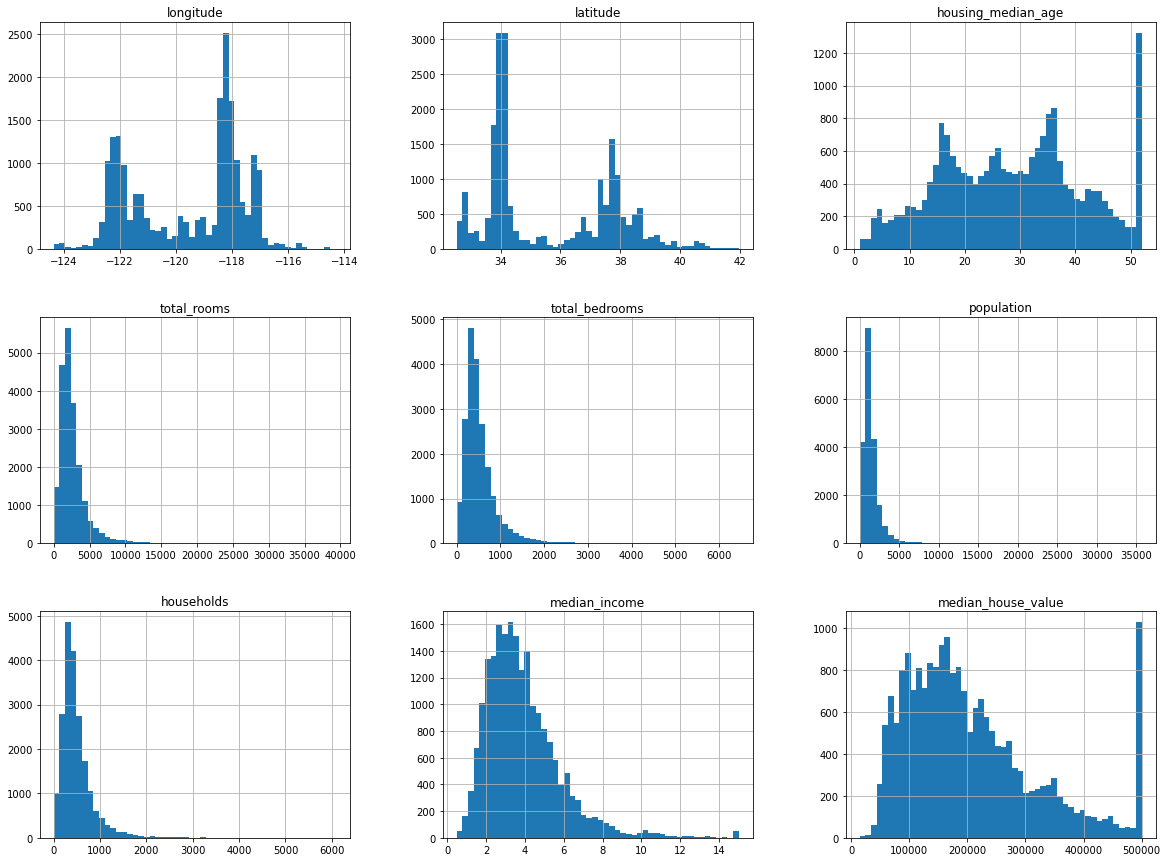

In [126]:
# To plot a histogram to understand the data
df.hist(bins=50, figsize=(20,15))
plt.show()

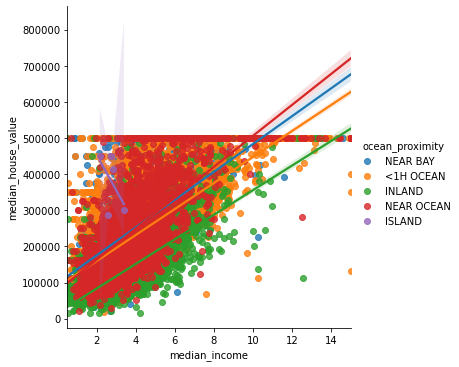

In [121]:
import seaborn as sns
sns.lmplot(x="median_income", y="median_house_value", hue="ocean_proximity", data=df);

In [120]:
df.tail()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,ocean_proximity,median_house_value
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,INLAND,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,INLAND,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,INLAND,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,INLAND,84700
20639,-121.24,39.37,16,2785,616.0,1387,530,2.3886,INLAND,89400


## Predict the median housing price

In [58]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069608,0.099773,0.055310,-0.015176,-0.045967
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066983,-0.108785,-0.071035,-0.079809,-0.144160
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.320451,-0.296244,-0.302916,-0.119034,0.105623
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.930380,0.857126,0.918484,0.198050,0.134153
total_bedrooms,0.069608,-0.066983,-0.320451,0.930380,1.000000,0.877747,0.979728,-0.007723,0.049686
population,0.099773,-0.108785,-0.296244,0.857126,0.877747,1.000000,0.907222,0.004834,-0.024650
households,0.055310,-0.071035,-0.302916,0.918484,0.979728,0.907222,1.000000,0.013033,0.065843
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007723,0.004834,0.013033,1.000000,0.688075
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049686,-0.024650,0.065843,0.688075,1.000000


In [59]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'ocean_proximity', 'median_house_value'],
      dtype='object')

In [ ]:
# Fill missing values with mean

In [61]:
df = df.fillna(df.mean())


In [62]:
df.isnull().sum()


longitude             0
latitude              0
housing_median_age    0
total_rooms           0
total_bedrooms        0
population            0
households            0
median_income         0
ocean_proximity       0
median_house_value    0
dtype: int64

In [104]:
df.dtypes

longitude                     float64
latitude                      float64
housing_median_age            float64
total_rooms                   float64
total_bedrooms                float64
population                    float64
households                    float64
median_income                 float64
median_house_value            float64
ocean_proximity_<1H OCEAN     float64
ocean_proximity_INLAND        float64
ocean_proximity_ISLAND        float64
ocean_proximity_NEAR BAY      float64
ocean_proximity_NEAR OCEAN    float64
dtype: object

In [ ]:
# select categorical data

In [102]:
df_obj = df.select_dtypes(include=['object']).copy()

In [103]:
df_obj

""
0
1
2
3
4
...
20635
20636
20637
20638


In [ ]:
# convert categorical data to dummy variables

In [66]:
df_dummy = pd.get_dummies(df[['ocean_proximity']])

In [67]:
df_dummy

,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,0,0,0,1,0
1,0,0,0,1,0
2,0,0,0,1,0
3,0,0,0,1,0
4,0,0,0,1,0
...,...,...,...,...,...
20635,0,1,0,0,0
20636,0,1,0,0,0
20637,0,1,0,0,0
20638,0,1,0,0,0


In [68]:
df_num = df.select_dtypes(include=['int64','float64']).copy()
df_num

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200
...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700


In [69]:
df = pd.concat([df_num, df_dummy], axis=1)

In [70]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-122.23,37.88,41,880,129.0,322,126,8.3252,452600,0,0,0,1,0
1,-122.22,37.86,21,7099,1106.0,2401,1138,8.3014,358500,0,0,0,1,0
2,-122.24,37.85,52,1467,190.0,496,177,7.2574,352100,0,0,0,1,0
3,-122.25,37.85,52,1274,235.0,558,219,5.6431,341300,0,0,0,1,0
4,-122.25,37.85,52,1627,280.0,565,259,3.8462,342200,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-121.09,39.48,25,1665,374.0,845,330,1.5603,78100,0,1,0,0,0
20636,-121.21,39.49,18,697,150.0,356,114,2.5568,77100,0,1,0,0,0
20637,-121.22,39.43,17,2254,485.0,1007,433,1.7000,92300,0,1,0,0,0
20638,-121.32,39.43,18,1860,409.0,741,349,1.8672,84700,0,1,0,0,0


In [71]:
df.corr()

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
longitude,1.000000,-0.924664,-0.108197,0.044568,0.069260,0.099773,0.055310,-0.015176,-0.045967,0.321121,-0.055575,0.009446,-0.474489,0.045509
latitude,-0.924664,1.000000,0.011173,-0.036100,-0.066658,-0.108785,-0.071035,-0.079809,-0.144160,-0.446969,0.351166,-0.016572,0.358771,-0.160818
housing_median_age,-0.108197,0.011173,1.000000,-0.361262,-0.318998,-0.296244,-0.302916,-0.119034,0.105623,0.045300,-0.236645,0.017020,0.255172,0.021622
total_rooms,0.044568,-0.036100,-0.361262,1.000000,0.927253,0.857126,0.918484,0.198050,0.134153,-0.003031,0.025624,-0.007572,-0.023022,-0.009175
total_bedrooms,0.069260,-0.066658,-0.318998,0.927253,1.000000,0.873910,0.974725,-0.007682,0.049454,0.018220,-0.006433,-0.004361,-0.019785,0.000676
population,0.099773,-0.108785,-0.296244,0.857126,0.873910,1.000000,0.907222,0.004834,-0.024650,0.074613,-0.020732,-0.010412,-0.060880,-0.024264
households,0.055310,-0.071035,-0.302916,0.918484,0.974725,0.907222,1.000000,0.013033,0.065843,0.042435,-0.039402,-0.009077,-0.010093,0.001714
median_income,-0.015176,-0.079809,-0.119034,0.198050,-0.007682,0.004834,0.013033,1.000000,0.688075,0.168876,-0.237496,-0.009228,0.056197,0.027344
median_house_value,-0.045967,-0.144160,0.105623,0.134153,0.049454,-0.024650,0.065843,0.688075,1.000000,0.256617,-0.484859,0.023416,0.160284,0.141862
ocean_proximity_<1H OCEAN,0.321121,-0.446969,0.045300,-0.003031,0.018220,0.074613,0.042435,0.168876,0.256617,1.000000,-0.607669,-0.013872,-0.314813,-0.342620


In [129]:
# Finding the correlation
corr_matrix = df.corr()
corr_matrix["median_house_value"].sort_values(ascending=False)

median_house_value    1.000000
median_income         0.688075
total_rooms           0.134153
housing_median_age    0.105623
households            0.065843
total_bedrooms        0.049686
population           -0.024650
longitude            -0.045967
latitude             -0.144160
Name: median_house_value, dtype: float64

In [72]:
df.columns

Index(['longitude', 'latitude', 'housing_median_age', 'total_rooms',
       'total_bedrooms', 'population', 'households', 'median_income',
       'median_house_value', 'ocean_proximity_<1H OCEAN',
       'ocean_proximity_INLAND', 'ocean_proximity_ISLAND',
       'ocean_proximity_NEAR BAY', 'ocean_proximity_NEAR OCEAN'],
      dtype='object')

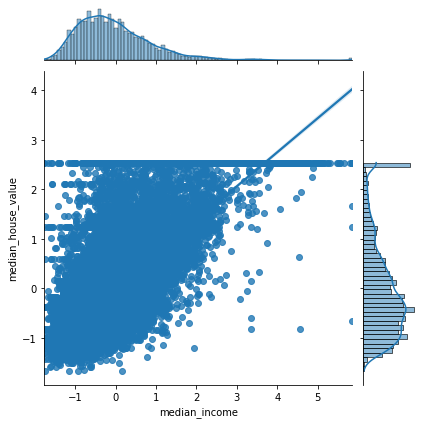

In [ ]:
# standardize the data

In [73]:
from sklearn.preprocessing import StandardScaler

In [74]:
# define a method to scale data, looping thru the columns, and passing a scaler
def scale_data(data, columns, scaler):
    for col in columns:
        data[col] = scaler.fit_transform(data[col].values.reshape(-1, 1))
    return data

In [78]:
# specify a scaler, and call the method on housing data
scaler = StandardScaler()
df = scale_data(df, df.columns, scaler)

In [79]:
df

,longitude,latitude,housing_median_age,total_rooms,total_bedrooms,population,households,median_income,median_house_value,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN
0,-1.327835,1.052548,0.982143,-0.804819,-0.975228,-0.974429,-0.977033,2.344766,2.129631,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
1,-1.322844,1.043185,-0.607019,2.045890,1.355088,0.861439,1.669961,2.332238,1.314156,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
2,-1.332827,1.038503,1.856182,-0.535746,-0.829732,-0.820777,-0.843637,1.782699,1.258693,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
3,-1.337818,1.038503,1.856182,-0.624215,-0.722399,-0.766028,-0.733781,0.932968,1.165100,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
4,-1.337818,1.038503,1.856182,-0.462404,-0.615066,-0.759847,-0.629157,-0.012881,1.172900,-0.891156,-0.681889,-0.015566,2.830742,-0.384466
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
20635,-0.758826,1.801647,-0.289187,-0.444985,-0.390860,-0.512592,-0.443449,-1.216128,-1.115804,-0.891156,1.466514,-0.015566,-0.353264,-0.384466
20636,-0.818722,1.806329,-0.845393,-0.888704,-0.925139,-0.944405,-1.008420,-0.691593,-1.124470,-0.891156,1.466514,-0.015566,-0.353264,-0.384466
20637,-0.823713,1.778237,-0.924851,-0.174995,-0.126106,-0.369537,-0.174042,-1.142593,-0.992746,-0.891156,1.466514,-0.015566,-0.353264,-0.384466
20638,-0.873626,1.778237,-0.845393,-0.355600,-0.307379,-0.604429,-0.393753,-1.054583,-1.058608,-0.891156,1.466514,-0.015566,-0.353264,-0.384466


C:\Users\srivi\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variables as keyword args: x, y. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


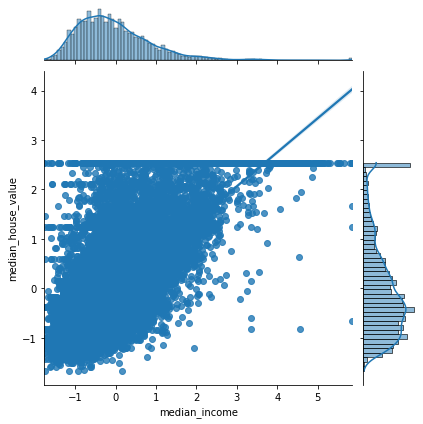

In [114]:
import matplotlib.pyplot as plt
import seaborn as sns
sns.jointplot(df['median_income'], df['median_house_value'], kind = 'reg')


<AxesSubplot:xlabel='longitude', ylabel='latitude'>

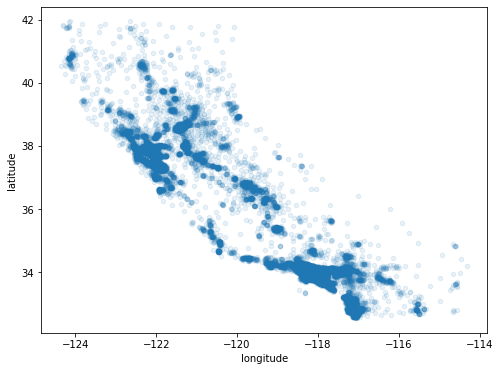

In [127]:
df.plot(kind="scatter", x="longitude", y="latitude", figsize = (8,6), alpha=0.1)

(0.0, 16.0, 0.0, 550000.0)

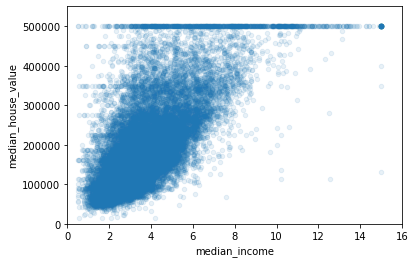

In [128]:
df.plot(kind="scatter", x="median_income", y="median_house_value", alpha=0.1)
plt.axis([0, 16, 0, 550000])

In [ ]:
# Extract input (X) and output (Y) data from the dataset.

In [80]:
X = df[['median_income','total_rooms','housing_median_age','total_bedrooms', 'households', 'population', 'ocean_proximity_<1H OCEAN','ocean_proximity_INLAND','ocean_proximity_ISLAND','ocean_proximity_NEAR BAY','ocean_proximity_NEAR OCEAN','longitude','latitude']]
y = df[['median_house_value']]

In [81]:
X.head()

,median_income,total_rooms,housing_median_age,total_bedrooms,households,population,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,longitude,latitude
0,2.344766,-0.804819,0.982143,-0.975228,-0.977033,-0.974429,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.327835,1.052548
1,2.332238,2.045890,-0.607019,1.355088,1.669961,0.861439,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.322844,1.043185
2,1.782699,-0.535746,1.856182,-0.829732,-0.843637,-0.820777,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.332827,1.038503
3,0.932968,-0.624215,1.856182,-0.722399,-0.733781,-0.766028,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.337818,1.038503
4,-0.012881,-0.462404,1.856182,-0.615066,-0.629157,-0.759847,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.337818,1.038503


In [82]:
y.head()

,median_house_value
0,2.129631
1,1.314156
2,1.258693
3,1.165100
4,1.172900


In [ ]:
# pip install sklearn

In [83]:
from sklearn.model_selection import train_test_split

In [84]:
# need to 'random' split data in train and test set

X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, random_state= 100)

# 80% in train
# 20% data in test

In [85]:
print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(16512, 13)
(4128, 13)
(16512, 1)
(4128, 1)


In [86]:
X_train.head()

,median_income,total_rooms,housing_median_age,total_bedrooms,households,population,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,longitude,latitude
3278,-0.251488,-0.964338,-1.242684,-1.018161,-1.144432,-1.069798,-0.891156,1.466514,-0.015566,-0.353264,-0.384466,-1.562427,1.642463
16630,-0.341130,0.282475,-1.401600,0.389092,0.419701,0.343087,-0.891156,-0.681889,-0.015566,-0.353264,2.601007,-0.629052,-0.146009
18748,-0.274070,0.637267,-0.845393,0.429640,0.537403,0.269793,-0.891156,1.466514,-0.015566,-0.353264,-0.384466,-1.367766,2.274515
14961,0.738734,-0.447736,-1.719432,-0.717629,-0.673622,-0.497580,1.122138,-0.681889,-0.015566,-0.353264,-0.384466,1.322549,-1.344567
1740,-0.806659,-0.182788,-0.765935,0.100486,0.134600,0.011059,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.382740,1.094685


In [87]:
y_test.head()

,median_house_value
8151,0.333159
53,-0.889620
3039,-0.525646
9484,-0.456318
9307,1.016911


In [88]:
X_test.head()

,median_income,total_rooms,housing_median_age,total_bedrooms,households,population,ocean_proximity_<1H OCEAN,ocean_proximity_INLAND,ocean_proximity_ISLAND,ocean_proximity_NEAR BAY,ocean_proximity_NEAR OCEAN,longitude,latitude
8151,-0.088206,-0.698932,0.584852,-0.844043,-0.843637,-0.866696,1.122138,-0.681889,-0.015566,-0.353264,-0.384466,0.733575,-0.852971
53,-1.380779,-0.461029,1.856182,-0.195276,-0.260357,-0.232664,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.347800,1.024457
3039,0.503180,0.866919,-1.242684,0.417714,0.448473,0.657454,-0.891156,1.466514,-0.015566,-0.353264,-0.384466,0.224461,-0.122600
9484,-0.519730,-0.737895,-0.765935,-0.793955,-0.909027,-0.884357,-0.891156,1.466514,-0.015566,-0.353264,-0.384466,-1.787035,1.722055
9307,-0.516046,1.796528,0.187562,2.464195,2.522649,1.356832,-0.891156,-0.681889,-0.015566,2.830742,-0.384466,-1.472583,1.099367


In [89]:
from sklearn.linear_model import LinearRegression

lm = LinearRegression()

lm.fit(X_train, y_train)   # training

LinearRegression()

In [ ]:
'''
y = m1 * X1 + m2 * X2 + c
x1 and X2 are known

m1, m2 --> coefficient
c --> intercept
'''

In [90]:
print(lm.coef_)

[[ 0.63479093 -0.08653056  0.11401053  0.26700287  0.23215012 -0.36911676
   0.05295611 -0.11119836  0.02668322  0.02585329  0.05051539 -0.46023755
  -0.46609335]]


In [91]:
print(lm.intercept_)

[0.00107679]


In [ ]:
# Price = 0.61882796 * AGST -0.00522888 * HarvestRain  -2.41909835

In [92]:
# predict the price of house on test data
prediction = lm.predict(X_test)

In [93]:
print(prediction)

[[ 0.13716726]
 [-0.4258172 ]
 [-0.20863476]
 ...
 [ 0.8933916 ]
 [-0.86792832]
 [-0.29282435]]


In [94]:
# Actual value
y_test

,median_house_value
8151,0.333159
53,-0.889620
3039,-0.525646
9484,-0.456318
9307,1.016911
...,...
16733,-0.776962
5264,2.540411
12374,0.281163
19662,-1.049942


In [95]:
'''
error = Actual - prediction
MSE
RMSE
MAE
'''

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

# error metrics for test data
MSE_test = mean_squared_error(y_test, prediction)
RMSE_test = sqrt(MSE_test)

MAE_test = mean_absolute_error(y_test, prediction)
MAPE_test = mean_absolute_percentage_error(y_test, prediction)

print('Mean square error for test data is :', MSE_test)
print('Root Mean square error for test data is :', RMSE_test)
print('Mean Absolute error for test data is :', MAE_test)
print('Mean Absolute percentage error for test data is :', MAPE_test)

Mean square error for test data is : 0.3386252697622692
Root Mean square error for test data is : 0.5819151740264806
Mean Absolute error for test data is : 0.4263107001187393
Mean Absolute percentage error for test data is : 2.015757733888722


In [96]:
# predict the price of house on train data
prediction_train = lm.predict(X_train)

In [97]:
prediction_train

array([[-0.64514109],
       [ 0.18301663],
       [-0.85441401],
       ...,
       [-0.57537344],
       [-0.30883402],
       [ 0.61809722]])

In [99]:
# error metric for train data

'''
error = Actual - prediction
Actual = y_train
Prediction = prediction_train
MSE
RMSE
MAE
'''

from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error, mean_absolute_percentage_error
from math import sqrt

# error metrics for train data
MSE_train = mean_squared_error(y_train, prediction_train)
RMSE_train = sqrt(MSE_train)

MAE_train = mean_absolute_error(y_train, prediction_train)
MAPE_train = mean_absolute_percentage_error(y_train, prediction_train)

print('Mean square error for train data is :', MSE_train)
print('Root Mean square error for train data is :', RMSE_train)
print('Mean Absolute error for train data is :', MAE_train)
print('Mean Absolute percentage error for train data is :', MAPE_train)

###########################################################################
r_square = r2_score(y_train, prediction_train)
print('R square for train data is :', r_square)

Mean square error for train data is : 0.3585992524304906
Root Mean square error for train data is : 0.5988315726733943
Mean Absolute error for train data is : 0.4335556273586494
Mean Absolute percentage error for train data is : 2.0328539263824057
R square for train data is : 0.6403184439877669


In [131]:
residuals = prediction - y_test

(array([   6.,   20.,   67.,  119.,  245.,  669., 1629., 1158.,  193.,
          22.]),
 array([-3.02020704, -2.54950384, -2.07880064, -1.60809744, -1.13739425,
        -0.66669105, -0.19598785,  0.27471534,  0.74541854,  1.21612174,
         1.68682493]),
 <BarContainer object of 10 artists>)

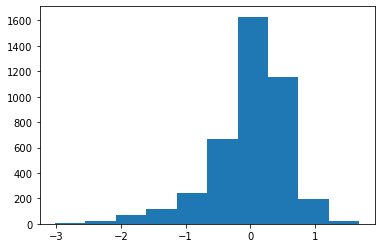

In [132]:
plt.hist(residuals)